In [4]:
import numpy as np
from typing import List
# Import defaultdict to create a dictionary with default values
from collections import defaultdict
from collections import defaultdict
from queue import Queue
from copy import  deepcopy
import matplotlib.pyplot as plt

In [2]:
def nextGreaterElement(nums1: List[int], nums2: List[int]) -> List[int]:
    stack, result = [], defaultdict()
    for idx2 in range(len(nums2) - 1, -1, -1):
        num = nums2[idx2]
        if len(stack) == 0:
            result[num] = -1
        elif stack[-1] > num:
            result[num] = stack[-1]
        elif stack[-1] <= num:
            while len(stack) > 0 and stack[-1] <= num:
                stack.pop()
            if len(stack) == 0:
                result[num] = -1
            else:
                result[num] = stack[-1]
        stack.append(nums2[idx2])
    
    sol = []
    for val in nums1:
        sol.append(result[val])
    return  sol

nums1 = [2, 4]
nums2 = [1, 2, 3, 4]
nextGreaterElement(nums1, nums2)

[3, -1]

In [57]:
def nextGreaterElements(nums: List[int]) -> List[int]:
    nums = nums[::-1]
    length = len(nums)    
    stack, result = [], [0] * length
    visited = dict([(val, (False, idx)) for idx, val in enumerate(nums)])
    
    for idx in range(length-1, -1, -1):
        num = nums[idx]
        if len(stack) == 0:
            result[idx] = -1
        elif stack[-1] > num:
            if visited[num][0]: # Has been visited
                result[visited[num][1]] = stack[-1] # Update the point where it was visited as well
            result[idx] = stack[-1] # Update current point
        elif stack[-1] <= num:
            # pop elements as long as we find the greater element
            while len(stack) > 0 and stack[-1] <= num:
                stack.pop()
            if len(stack) == 0:
                result[idx] = -1
            else: # Has been visited
                if visited[num][0]:
                    result[visited[num][1]] = stack[-1]
                result[idx] = stack[-1]
        # Mark the number as visited in the visited array
        visited[num] = (True, idx)
        stack.append(num)
    
    return  result[::-1]

nums = [5, 4, 3, 2, 1]
nextGreaterElements(nums=nums)

[-1, 5, 4, 3, 2]

In [68]:
def maxOperations(nums: List[int], k: int) -> int:
    nums.sort()
    operations = 0
    pointer1, pointer2 = 0, len(nums) - 1
    
    while pointer1 < pointer2:
        summ = nums[pointer1] + nums[pointer2]
        if summ == k:
            operations += 1
            pointer1 += 1
            pointer2 -= 1
        elif summ < k:
            pointer1 += 1
        else:
            pointer2 -= 1
    return operations
            
nums = [3, 1, 3, 4, 3]
k = 6
maxOperations(nums, k)

1

In [92]:
def canVisitAllRooms(rooms: List[List[int]]) -> bool:
    rooms_seen = [False] * (len(rooms))
    def dfs(room):
        rooms_seen[room] = True
        for key in rooms[room]:
            if not rooms_seen[key]:
                dfs(key)
    dfs(0)
    if all(rooms_seen):
        return True
    return False

rooms = [[1],[2],[3],[]]
canVisitAllRooms(rooms)

True

In [54]:
def findCircleNum(isConnected: List[List[int]]) -> int:
    def make_adjacency_hashmap(adjacency_matrix:List[List[int]]) -> dict:
        """Create an adjacency list/ adjacency hashmap from an adjacency matrix
        Args:
            adjacency_matrix(List[List[int]]): the adjacency matrix
        Returns:
            dict: the adjacency hashmap"""
        n = len(adjacency_matrix)
        # Create a hashmap for all the elements in the graph
        adj_hashmap = dict([(val+1, []) for val in range(n)])
        for i in range(n): # rows
            for j in range(n): # columns
                if adjacency_matrix[i][j] == 1:
                    adj_hashmap[i+1] += [j+1] # Append to dictionary 
        return adj_hashmap
    
    # Convert the given adjacency matrix to adjacency hashmap
    hashmap = make_adjacency_hashmap(isConnected)
    visited = dict([(val+1, False) for val in range(len(hashmap))])
    
    def dfs(graph:dict, node:int, visited:dict) -> None:
        """Traverse a graph using the Depth First Search
        Args:
            graph : the adjacency list of graph vertices
            node: the starting node for traversal
            visited: an visited hashmap for seeing the nodes already visited
        Returns:
            None"""
        visited[node] = True
        for neighbour in graph[node]:
            if not visited[neighbour]:
                dfs(graph = graph, node = neighbour, visited = visited)
                
    counter = 0    # counter to keep track of the number of provinces   
    for vertex in hashmap.keys():
        if not visited[vertex]:
            # if the node has not been visited we can apply dfs there as it is inside
            # a province, else we move on to th next province
            counter += 1
            dfs(graph=hashmap, node=vertex, visited=visited)
            
    return counter

In [55]:
isConnected = [[1,0,0],[0,1,0],[0,0,1]]
findCircleNum(isConnected)

3

In [84]:
def bfs(grid: dict) -> int:
    n, m = len(grid), len(grid[0]) # Get the dimensions of the grid
    q = Queue()
    fresh_count = 0
    visited = deepcopy(grid)
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 2:
                q.put(((i, j), 0)) # the element and the time at which they are rotten
            elif grid[i][j] == 1:
                fresh_count += 1

    time_stmp = 0
    d_row = [-1, 0, 1, 0]
    d_col = [ 0, 1, 0, -1]
    count = 0
    while not q.empty():
        stamp = q.get()
        (row, col), time = stamp[0], stamp[1]
        time_stmp = max(time_stmp, time)
        for neighbour in range(4):
            nrow = row + d_row[neighbour]
            ncol = col + d_col[neighbour]
            if 0 <= nrow < n and 0 <= ncol < m and visited[nrow][ncol] != 2 and grid[nrow][ncol] == 1:
                q.put(((nrow, ncol), time + 1))
                count += 1
                visited[nrow][ncol] = 2
    return fresh_count, count
    if fresh_count != count:
        return  -1
    return time_stmp


grid = [[2,1,1],[0,1,1],[1,0,1]]
bfs(grid)

KeyboardInterrupt: 

In [9]:
val_dict = []

for i in range(13):
    for j in range(13):
        for k in range(13):
            val_dict.append((i + j + k))

(array([  1.,   0.,   0.,   3.,   0.,   0.,   0.,   6.,   0.,   0.,  10.,
          0.,   0.,   0.,  15.,   0.,   0.,   0.,  21.,   0.,   0.,  28.,
          0.,   0.,   0.,  36.,   0.,   0.,  45.,   0.,   0.,   0.,  55.,
          0.,   0.,   0.,  66.,   0.,   0.,  78.,   0.,   0.,   0.,  91.,
          0.,   0., 102.,   0.,   0.,   0., 111.,   0.,   0.,   0., 118.,
          0.,   0., 123.,   0.,   0.,   0., 126.,   0.,   0.,   0., 127.,
          0.,   0., 126.,   0.,   0.,   0., 123.,   0.,   0., 118.,   0.,
          0.,   0., 111.,   0.,   0.,   0., 102.,   0.,   0.,  91.,   0.,
          0.,   0.,  78.,   0.,   0.,  66.,   0.,   0.,   0.,  55.,   0.,
          0.,   0.,  45.,   0.,   0.,  36.,   0.,   0.,   0.,  28.,   0.,
          0.,  21.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,  10.,   0.,
          0.,   6.,   0.,   0.,   0.,   3.,   0.,   0.,   1.]),
 array([ 0.        ,  0.27692308,  0.55384615,  0.83076923,  1.10769231,
         1.38461538,  1.66153846,  1.93846154,  2

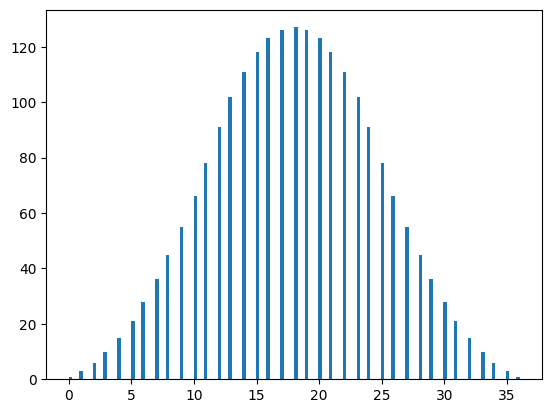

In [12]:
import matplotlib.pyplot as plt

plt.hist(val_dict, bins=130)

In [19]:
matrix = np.array([
    [1, 2, 3], 
    [0, -2, 1],
    [0, 0, 1]
])

x1 = np.array([
    [3], 
    [-2], 
    [1]
])

x2 = np.array([
    [-3], 
    [2], 
    [-1]
])

x3 = np.array([
    [1], 
    [-2], 
    [3]
])

x4 = np.array([
    [2], 
    [5], 
    [0]
])


1-0.62

0.38

In [3]:
p = 0.15
q = 0.85

val = np.math.comb(40, 5) * (p ** 5) * (q ** 35)

# Find greatest integert funnction of val

np.math.floor(val)

0

In [8]:
from scipy.stats import pearsonr
import sympy as sp 
x = sp.symbols('x', real=True)
k = sp.symbols('k', real=True, constant = True)

sp.solve(sp.Eq(- (3*x + 4) / (20 + 12*x), 1/8), x)

[-1.44444444444444]

In [9]:
nitrogen = np.array([0.32, 0.6, 0.3])
carbon = np.array([0.1, 0, 0.6])

pearsonr(nitrogen, carbon)

PearsonRResult(statistic=-0.6738673703623107, pvalue=0.5292638149273424)